# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [71]:
# imports
import panel as pn
from panel.interact import interact
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
#from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [19]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAP_API_TOKEN")


## Load Data

In [20]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [33]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
housing_units= sfo_data.groupby('year').mean()

houd = housing_units.drop(['sale_price_sqr_foot', 'gross_rent'], axis=1)
houd

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


In [36]:
# Save the dataframe as a csv file
housing_units_df = pd.DataFrame(houd)
housing_units_df.to_csv('output.csv')
# YOUR CODE HERE!

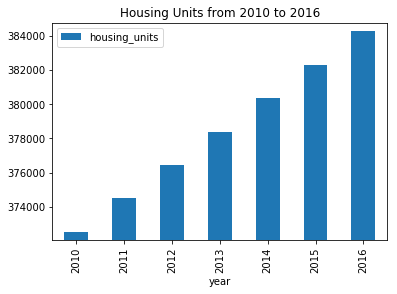

In [43]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!
units_min = housing_units.min()['housing_units']
units_max = housing_units.max()['housing_units']
housing_units_df.plot.bar(ylim =(units_min-500, units_max+500),title="Housing Units from 2010 to 2016")


# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
# YOUR CODE HERE!

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [52]:
# Calculate the average sale price per square foot and average gross rent
# YOUR CODE HERE!
average = sfo_data[['sale_price_sqr_foot','gross_rent']].mean()
average

sale_price_sqr_foot     489.209635
gross_rent             2765.722922
dtype: float64

In [ ]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
# YOUR CODE HERE!
avg_sales_price= sfo_data[['sale_price_sqr_foot']].groupby('year').mean()
plot_avg_sales_price = avg_sales_price.plot.line(ylim=[300, 800], xlim=[2009, 2017],
                            title='Average Sales Price in SFO')

# Line chart for average montly rent
# YOUR CODE HERE!
avg_gross_rent= sfo_data[['gross_rent']].groupby('year').mean()
plot_avg_gross_rent = avg_gross_rent.plot.line(ylim=[1000, 4500], xlim=[2009, 2017],
                            title='Average Gross Rent in SFO')



- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [ ]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!
sf_dataset = sfo_data.groupby([sfo_data.index, 'neighborhood']).mean()
sf_neighborhood_data = sf_dataset[['housing_units','sale_price_sqr_foot','gross_rent']]
sf_neighborhood_data_df = pd.DataFrame(sf_neighborhood_data).reset_index()
sf_neighborhood_data_df.head()

In [153]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

sp_neighborhood_plot = sf_neighborhood_data_df.hvplot.line(
                               x='year',
                               y='sale_price_sqr_foot',
                               groupby="neighborhood",
                               title="SFO Neighborhood's Sale Price per Square foot",)
sp_neighborhood_plot



:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [154]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

gr_neighborhood_plot = sf_neighborhood_data_df.hvplot.line(
                               x="year",
                               y="gross_rent",
                               groupby="neighborhood",
                               title="SFO Neighborhood's Average Gross Rent",)
gr_neighborhood_plot

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [122]:
# Getting the data from the top 10 expensive neighborhoods to own
# YOUR CODE HERE!
top_10 = sfo_data.drop(["housing_units","gross_rent"], axis=1).groupby('neighborhood').mean().sort_values(by='sale_price_sqr_foot', ascending=False).head(10)
top_10

,sale_price_sqr_foot
neighborhood,
Union Square District,903.993258
Merced Heights,788.844818
Miraloma Park,779.810842
Pacific Heights,689.555817
Westwood Park,687.087575
Telegraph Hill,676.506578
Presidio Heights,675.350212
Cow Hollow,665.964042
Potrero Hill,662.013613


In [149]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
top_10.hvplot.bar(
    x="neighborhood", 
    y="sale_price_sqr_foot",
    title="Top 10 Most Expensive Neighborhoods in SFO", 
    ylabel="Sales Price per sqf",
    height=400,
    rot=40)


:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [150]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
# YOUR CODE HERE!
grp_year_nbrhd= sfo_data.groupby(["year","neighborhood"]).mean()
grp_year_nbrhd

sale_price_sqr_foot  housing_units  \
year neighborhood                                                        
2010 Alamo Square                            291.182945         372560   
     Anza Vista                              267.932583         372560   
     Bayview                                 170.098665         372560   
     Buena Vista Park                        347.394919         372560   
     Central Richmond                        319.027623         372560   
     Central Sunset                          418.172493         372560   
     Corona Heights                          369.359338         372560   
     Cow Hollow                              569.379968         372560   
     Croker Amazon                           165.645730         372560   
     Diamond Heights                         456.930822         372560   
     Downtown                                241.804552         372560   
     Eureka Valley/Dolores Heights           403.118313         372560   
     Excelsior                               364.928336         372560   
     Financial District North                401.749967         372560   
     Financial District South                162.821210         372560   
     Forest Knolls                           209.049327         372560   
     Glen Park                               715.586438         372560   
     Golden Gate Heights                     551.801119         372560   
     Haight Ashbury                          254.473779         372560   
     Hayes Valley                            272.284980         372560   
     Hunters Point                           170.624920         372560   
     Ingleside                               275.056686         372560   
     Inner Mission                           238.350020         372560   
     Inner Parkside                          199.702004         372560   
     Inner Richmond                          285.822358         372560   
     Inner Sunset                            275.769730         372560   
     Jordan Park/Laurel Heights              419.887812         372560   
     Lake --The Presidio                     320.796910         372560   
     Lone Mountain                           398.458876         372560   
     Lower Pacific Heights                   374.057636         372560   
...                                                 ...            ...   
2016 Inner Mission                           647.770447         384242   
     Inner Parkside                          518.112650         384242   
     Inner Richmond                          403.311132         384242   
     Inner Sunset                            445.923828         384242   
     Jordan Park/Laurel Heights              704.566419         384242   
     Lower Pacific Heights                   636.430770         384242   
     Marina                                  431.944602         384242   
     Merced Heights                         1416.666667         384242   
     Mission Bay                             924.569116         384242   
     Mission Terrace                         879.017013         384242   
     Nob Hill                                777.008315         384242   
     Noe Valley                              799.495651         384242   
     North Beach                             407.553322         384242   
     Outer Mission                            40.772625         384242   
     Outer Parkside                          732.720684         384242   
     Outer Richmond                         1196.645437         384242   
     Outer Sunset                            510.576907         384242   
     Pacific Heights                         996.389364         384242   
     Park North                              211.301370         384242   
     Parnassus/Ashbury Heights              1207.997485         384242   
     Potrero Hill                            707.651609         384242   
     Presidio Heights                   

In [151]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!
plot = sfo_data.hvplot.bar(
                               x="year",
                               y=["sale_price_sqr_foot", "gross_rent"],
                               groupby="neighborhood",
                               title="SFO Neighborhood's Average Gross Rent",
                               ylabel="Sales prices per sqf / Gross Rent",
                               width= 1000, height= 500, rot=90)
plot

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [196]:
# Load neighborhoods coordinates data
# YOUR CODE HERE
file_path = Path("Data/neighborhoods_coordinates.csv")
neighborhood_cod = pd.DataFrame(pd.read_csv(file_path))
neighborhood_cod.rename(columns={"Neighborhood": "neighborhood"}, inplace=True)
neighborhood_cod.head()


,neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [175]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
neighborhood_mean = pd.DataFrame(sfo_data.groupby("neighborhood").mean())
neighborhood_mean.head()

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333


In [201]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!
sfo_data_cod = pd.merge(
    neighborhood_cod, neighborhood_mean,
    how="inner",
    on='neighborhood',
    sort=True  
)

sfo_data_cod.head()

,neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

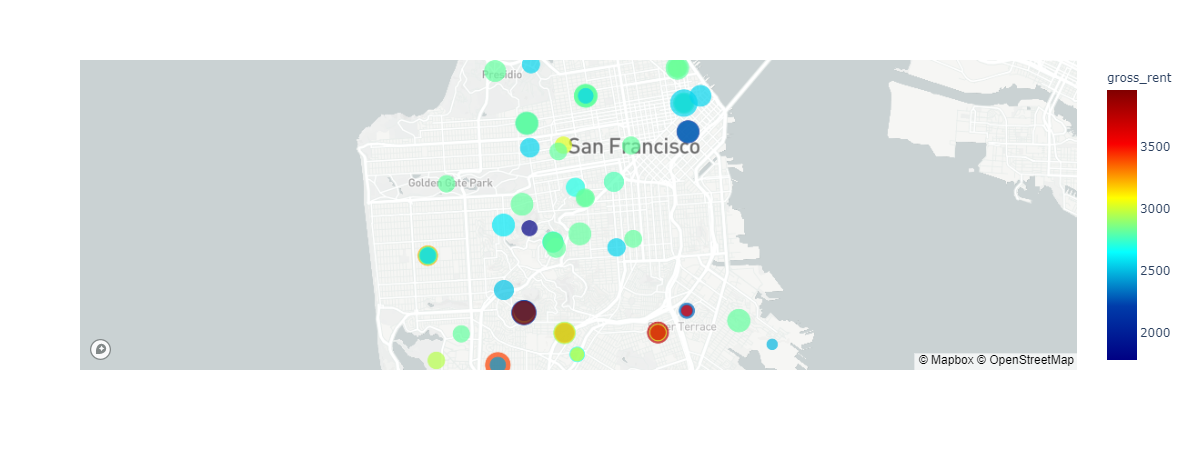

In [204]:
# Set the mapbox access token
# YOUR CODE HERE!

px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info

px.scatter_mapbox(sfo_data_cod,
                  lat="Lat",
                  lon="Lon",
                  size='sale_price_sqr_foot', 
                  color='gross_rent',
                  zoom=11,
                  hover_name='neighborhood',
                  color_continuous_scale=px.colors.sequential.Jet
                 )

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


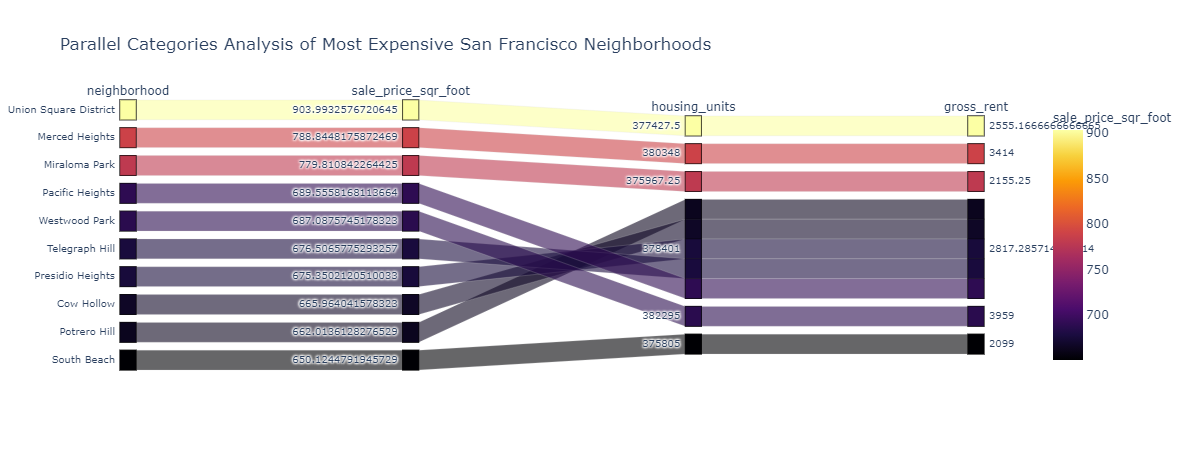

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

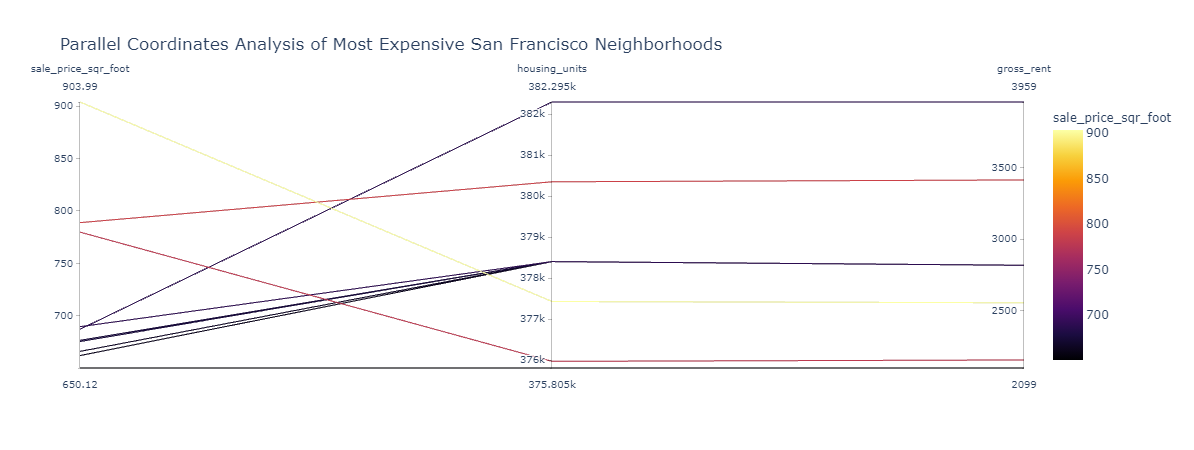

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

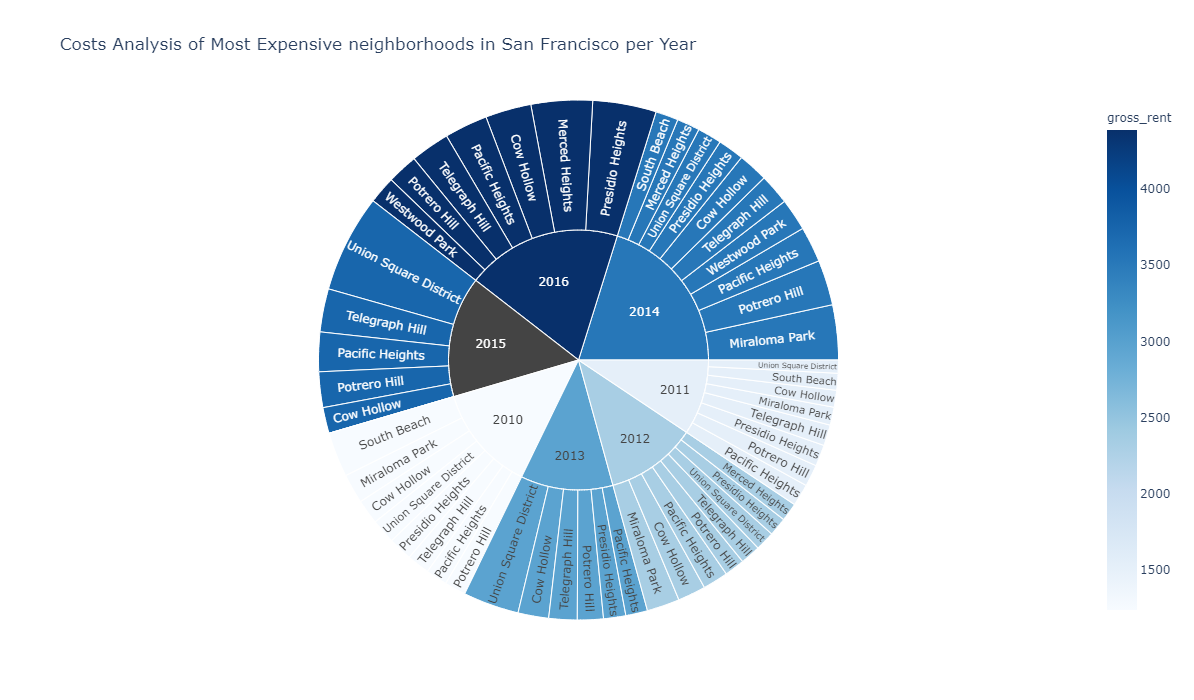

In [23]:
# Sunburst Plot
# YOUR CODE HERE!